In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as ms
import glob
import pyodbc
import gspread
from datetime import datetime

# EXTRACCION

In [5]:
# Enlistar todas los archivos planos de texto
list_files = glob.glob(r'C:\Users\wmr_w\weimar\ETL\SUPERMAYORISTA_Data_Analyst\Banco/*.txt')
print(list_files)

['C:\\Users\\wmr_w\\weimar\\ETL\\SUPERMAYORISTA_Data_Analyst\\Banco\\2022-01.txt', 'C:\\Users\\wmr_w\\weimar\\ETL\\SUPERMAYORISTA_Data_Analyst\\Banco\\2022-02.txt', 'C:\\Users\\wmr_w\\weimar\\ETL\\SUPERMAYORISTA_Data_Analyst\\Banco\\2022-03.txt', 'C:\\Users\\wmr_w\\weimar\\ETL\\SUPERMAYORISTA_Data_Analyst\\Banco\\2022-04.txt', 'C:\\Users\\wmr_w\\weimar\\ETL\\SUPERMAYORISTA_Data_Analyst\\Banco\\2022-05.txt', 'C:\\Users\\wmr_w\\weimar\\ETL\\SUPERMAYORISTA_Data_Analyst\\Banco\\2022-06.txt', 'C:\\Users\\wmr_w\\weimar\\ETL\\SUPERMAYORISTA_Data_Analyst\\Banco\\2022-07.txt', 'C:\\Users\\wmr_w\\weimar\\ETL\\SUPERMAYORISTA_Data_Analyst\\Banco\\2022-08.txt', 'C:\\Users\\wmr_w\\weimar\\ETL\\SUPERMAYORISTA_Data_Analyst\\Banco\\2022-09.txt', 'C:\\Users\\wmr_w\\weimar\\ETL\\SUPERMAYORISTA_Data_Analyst\\Banco\\2022-10.txt', 'C:\\Users\\wmr_w\\weimar\\ETL\\SUPERMAYORISTA_Data_Analyst\\Banco\\2022-11.txt', 'C:\\Users\\wmr_w\\weimar\\ETL\\SUPERMAYORISTA_Data_Analyst\\Banco\\2022-12.txt']


In [6]:
# CONCATENAR txt
df = pd.concat(map(pd.read_csv, list_files), ignore_index=True)
df.head()

,1
0,BAN05FYYYYY 2022010103799.5006 Z0000020001XX...
1,BAN05FYYYYY 2022010100629.5007 Z0000020001XX...
2,BAN05FYYYYY 2022010100159.5013 Z0000020001XX...
3,BAN05FYYYYY 2022010100184.5015 Z0000020001XX...
4,BAN05FYYYYY 2022010100139.5004 Z0000020001XX...


In [7]:
# CONEXION
server = 'DESKTOP-IM12SBS'
db = 'SUPERMAYORISTA'

#try:
#create connection
conn = pyodbc.connect('DRIVER={SQL Server};SERVER=' + server + ';DATABASE=' + db + ';Trusted_Connection=yes')
#  print("conex exitosa")
#except Exception as ex:
#  print(ex)

In [8]:
# SQl VENTAS
sql = """
Select Null as banco, fecha_venta fecha, precio_unitario preciounitario, cantidad, cod_documento nrodocumento, dni_cliente dni, cod_producto nroproducto, cod_vendedor nrovendedor--,estado
from V_DetalleVentas
""" #banco	fecha	preciounitario	cantidad	nrodocumento	dni	nroproducto	nrovendedor
df_ventasql = pd.read_sql(sql, conn)
df_ventasql['dni'] = df_ventasql['dni'].str[:8]

c:\Users\wmr_w\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [37]:
# SQL VENTAS_ALL
query = """
Select * from V_DetalleVentasALL
"""
df_ventasAll = pd.read_sql(query, conn)

c:\Users\wmr_w\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [9]:
# SQL MAESTRO_VENDEDOR
query = """
Select * from vendedor
"""
df_Mvendedor = pd.read_sql(query, conn)

c:\Users\wmr_w\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [10]:
# SQL MAESTRO_CLIENTE
query = """
Select * from cliente
"""
df_Mcliente = pd.read_sql(query, conn)
df_Mcliente['dni_cliente'] = df_Mcliente['dni_cliente'].str[:8]

c:\Users\wmr_w\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [11]:
# MSQL MAESTRO PRODUCTO
query = """
Select * from producto
"""
df_Mproducto = pd.read_sql(query, conn)

c:\Users\wmr_w\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [14]:
print(df_Mcliente.isnull().sum())

dni_cliente             0
sexo_cliente            0
fecha_nacimiento        0
departamento_cliente    0
distrito_cliente        0
ubigeo_cliente          0
punto_geografico        0
dtype: int64


In [16]:
# LISTAS BANCOS
cod_banco = ['BAN01','BAN02','BAN03','BAN04','BAN05','BAN06','BAN00']
nombre_banco = ['BBVA','BCP','SCOTIABANK','INTERBANK','MI BANCO','CAJA HUANCAYO','NA']
comision = [2.8,3.5,2,3,4.2,3.3,0]

In [17]:
# DATAFRAME BANCOS
banco = pd.DataFrame()
banco['cod_banco'] = cod_banco
banco['nombre_banco'] = nombre_banco
banco['comision'] = comision
banco


,cod_banco,nombre_banco,comision
0,BAN01,BBVA,2.8
1,BAN02,BCP,3.5
2,BAN03,SCOTIABANK,2.0
3,BAN04,INTERBANK,3.0
4,BAN05,MI BANCO,4.2
5,BAN06,CAJA HUANCAYO,3.3
6,BAN00,NA,0.0


# TRANSFORMACIÓN

In [18]:
# TRANSFORMAR TEXTO PLANO
df['banco'] = df['1'].str[:5]
df['tipodoc'] = df['1'].str[5:6]
#df['codint'] = df['1'].str[6:11]
df['fecha'] = pd.to_datetime(df['1'].str[13:21])
df['preciounitario'] = df['1'].str[21:29].astype(np.float64)
df['cantidad'] = df['1'].str[29:31].astype(np.int64)
#df['codinterno'] = df['1'].str[33:34]
df['nrodocumento'] = df['1'].str[34:44]
df['nrodocumento'] = df['tipodoc'] + df['nrodocumento'].str[1:] #formato del texto
#df['codinterno2']  = df['1'].str[44:46]
df['dni'] = df['1'].str[48:56]
#df['codinterno3'] = df['1'].str[56:58]
df['nroproducto'] = df['1'].str[58:67]
df['nroproducto'] = 'PROD' + df['nroproducto'].str[4:] #formato del texto
df['nrovendedor'] = df['1'].str[67:74]
df['nrovendedor'] = 'VEND' + df['nrovendedor'].str[4:] #formato del texto
#df['estado'] = 'VENDIDO'
#df['codinterno4'] = df['1'].str[74:77]

In [19]:
#Eliminar columna principal
df.drop(['1','tipodoc'],axis=1, inplace=True)

In [21]:
# VERIFICAR SI HAY VALORES NULOS
print(df.isnull().sum())

banco             0
fecha             0
preciounitario    0
cantidad          0
nrodocumento      0
dni               0
nroproducto       0
nrovendedor       0
dtype: int64


In [22]:
# TIPOS DE DATOS
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139934 entries, 0 to 139933
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   banco           139934 non-null  object        
 1   fecha           139934 non-null  datetime64[ns]
 2   preciounitario  139934 non-null  float64       
 3   cantidad        139934 non-null  int64         
 4   nrodocumento    139934 non-null  object        
 5   dni             139934 non-null  object        
 6   nroproducto     139934 non-null  object        
 7   nrovendedor     139934 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 8.5+ MB


In [23]:
df.head(1)

,banco,fecha,preciounitario,cantidad,nrodocumento,dni,nroproducto,nrovendedor
0,BAN05,2022-01-01,3799.5,6,F000020001,93507257,PROD05686,VEND041


In [24]:
df_ventasql.head(1)

,banco,fecha,preciounitario,cantidad,nrodocumento,dni,nroproducto,nrovendedor
0,None,2021-06-25,79.5,3,F000009568,19912601,PROD00584,VEND028


In [27]:
#unir texto plano y SQL
df_ventas = pd.concat([df_ventasql,df],axis=0)
df_ventas = df_ventas.reset_index(drop=True)
df_ventas['fecha'] = pd.to_datetime(df_ventas['fecha'])
#df_ventas = df_ventasql.merge()
df_ventas['banco'].fillna('BAN00',inplace=True)
df_ventas.head()

,banco,fecha,preciounitario,cantidad,nrodocumento,dni,nroproducto,nrovendedor
0,BAN00,2021-06-25,79.5,3,F000009568,19912601,PROD00584,VEND028
1,BAN00,2021-08-23,79.5,11,B000063794,30670247,PROD00584,VEND018
2,BAN00,2021-08-14,79.5,3,B000063398,34819643,PROD00584,VEND007
3,BAN00,2021-05-01,79.5,10,B000058304,93464668,PROD00585,VEND016
4,BAN00,2021-06-15,79.5,9,B000060511,83941817,PROD00585,VEND001


In [20]:
# # # agrupar para no exceder el limite de filas de google sheet
# # #df_ventas['nrodocumento'] = df_ventas['nrodocumento'].str[:1]
# # # df_ventas['fecha'] = df_ventas['fecha'].apply(lambda dt: dt.replace(day=1))
# # df_ventas_group = df_ventas.groupby(['banco','fecha','nrodocumento','dni','nroproducto','nrovendedor']).agg({
# #                                                                                                         'cantidad':'sum',
# #                                                                                                         'preciounitario':'mean'
# # }).reset_index()
# # df_ventas_group['fecha']=pd.to_datetime(df_ventas_group['fecha'])

In [28]:
# EEMPLAZAR NOMBRE DE COLUMNAS PAR EL MERGE
#df_ventas_group.columns = df_ventas_group.columns.str.replace(['nrovendedor','nroproducto'], ['cod_vendedor','cod_producto'])
df_ventas.rename(columns={'nroproducto':'cod_producto',
                                'nrovendedor':'cod_vendedor',
                                'dni':'dni_cliente',
                                'banco':'cod_banco'}, inplace=True)

In [30]:
df_ventas.head(1)

,cod_banco,fecha,preciounitario,cantidad,nrodocumento,dni_cliente,cod_producto,cod_vendedor
0,BAN00,2021-06-25,79.5,3,F000009568,19912601,PROD00584,VEND028


<AxesSubplot:>

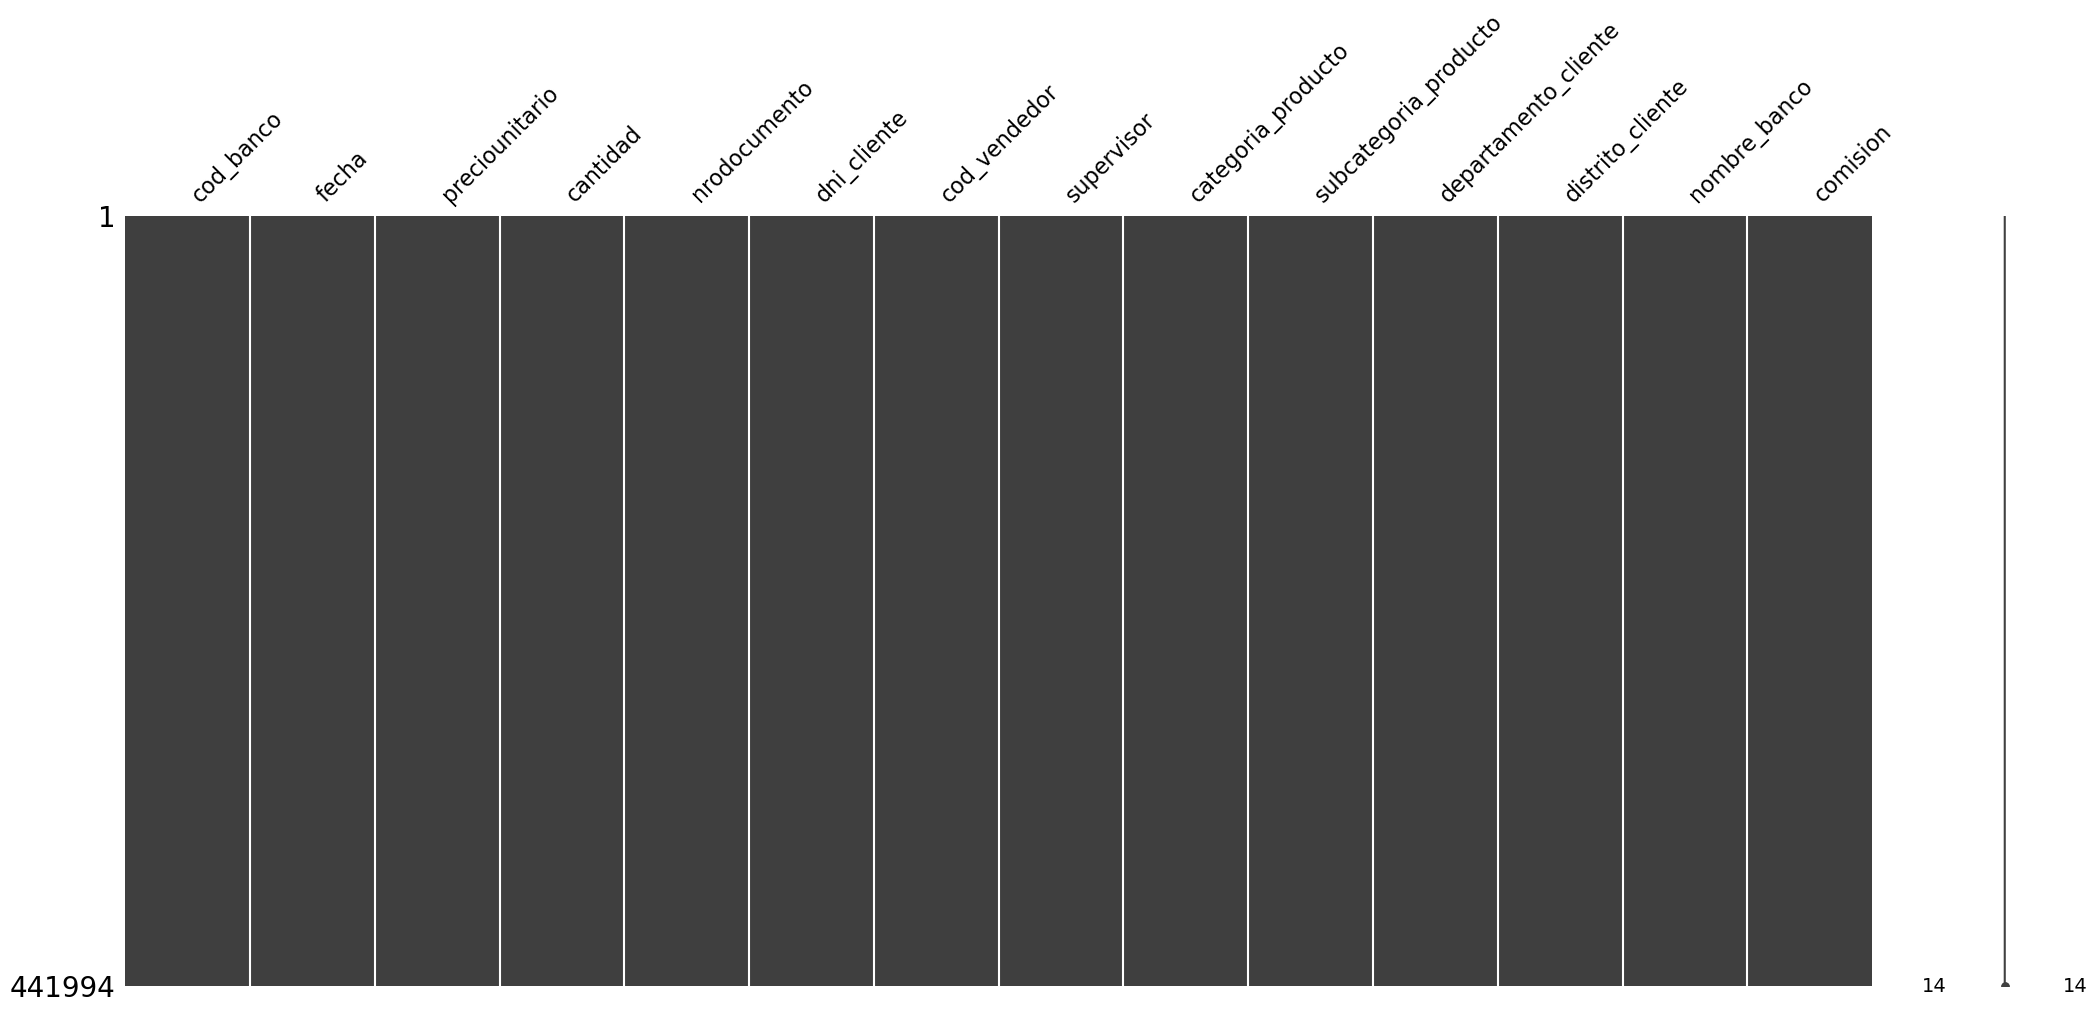

In [31]:
# MERGE 
#df_sales = df_ventas_group.merge(df_Mvendedor[['cod_vendedor','supervisor']], how='left',left_on='cod_vendedor',right_on='cod_vendedor')
#df_sales = pd.merge(df_ventas_group,df_Mvendedor[['cod_vendedor','supervisor']],on='cod_vendedor',how='left')
df_sales = df_ventas.merge(df_Mvendedor[['cod_vendedor','supervisor']],how ='left').merge(
                            df_Mproducto[['cod_producto','nombre_producto','categoria_producto','subcategoria_producto']],how ='left').merge(
                            df_Mcliente[['dni_cliente','departamento_cliente','distrito_cliente','punto_geografico']],how ='left').merge(
                            banco[['cod_banco','nombre_banco','comision']]
                            )
#df_sales.drop(['Unnamed: 0'], axis=1, inplace=True)
#df_sales['punto_geografico'].astype(str)
df_sales['supervisor'].fillna('SUPERVISOR', inplace=True)
df_sales['fecha'] = pd.to_datetime(df_sales['fecha'])
df_sales.drop(['cod_producto','punto_geografico','nombre_producto'],axis=1,inplace=True)
ms.matrix(df_sales)

In [32]:
df_sales.head(1)

,cod_banco,fecha,preciounitario,cantidad,nrodocumento,dni_cliente,cod_vendedor,supervisor,categoria_producto,subcategoria_producto,departamento_cliente,distrito_cliente,nombre_banco,comision
0,BAN00,2021-06-25,79.5,3,F000009568,19912601,VEND028,VEND025,BEBIDAS,"JUGOS, REFRESCOS Y MALTAS",PUNO,MACARI,NA,0.0


In [113]:
# # df_sales = pd.merge(df_ventas,df_Mvendedor[['cod_vendedor','supervisor']],on='cod_vendedor',how='left')
# # #df_sales['supervisor'].fillna('SUPERVISOR', inplace=True)
# # df_sales = pd.merge(df_sales,df_Mproducto[['cod_producto','nombre_producto','categoria_producto','subcategoria_producto']],on='cod_producto',how='left')
# # df_sales = pd.merge(df_sales,df_Mcliente[['dni_cliente','departamento_cliente','distrito_cliente','punto_geografico']],on='dni_cliente',how='left')
# # df_sales.sort_values('fecha')
# # ms.matrix(df_sales)#[df_sales['fecha'].dt.year<2022])


In [130]:
# # # AGRUPAR QUITANDO DNI_CLIENTE Y PUNTO GEOGRAFICO Y AÑADE SUM(DNI_CLIENTE) QUE ES NRO DE TRASACCIONES
# # df_sales_group = df_sales.groupby(['cod_banco', 'fecha', 'nrodocumento',  'cod_producto',
# #        'cod_vendedor', 'supervisor',
# #        'nombre_producto', 'categoria_producto', 'subcategoria_producto',
# #        'departamento_cliente', 'distrito_cliente',
# #        'nombre_banco', 'comision']).agg({
# #                                                                                                         'cantidad':'sum',
# #                                                                                                         'preciounitario':'mean',
# #                                                                                                         'dni_cliente':'count'
# # }).reset_index()
# # df_sales_group['fecha']=pd.to_datetime(df_sales_group['fecha'])
# # df_sales_group

# CARGA

In [39]:
def Cargar(df,key):
    #df['date'] = df['date'].dt.strftime('%Y-%m-%d %H:%M:%S')
    #df.info()
    gc = gspread.service_account(filename='etlsupermayorista.json')
    #sh = gc.open_by_key('1bJwOFMDMy0ve8Y8UTr04j1T6L0KbcWveV5q1JURDG6E')
    sh = gc.open_by_key(key)
    worksheet = sh.get_worksheet(0)
    
    max_row = len(worksheet.get_all_values()) + 1
    max_rows = 'A'+str(max_row)
    max_rows
    #df['fecha'] = df['fecha'].dt.strftime('%Y-%m-%d %H:%M:%S')
    worksheet.resize(rows=max_row -1 + df.shape[0]) #añadir filas al sheet
    
    worksheet.update(max_rows,df.values.tolist(),value_input_option='USER_ENTERED')
    
    #Insertar(CHresumen,0) #Inserta el dataframe en el google sheet
    print('>>> Transferencia exitosa')
    print(datetime.today().strftime('%A, %B %d, %Y %H:%M:%S'))
    #return df
    #print(max_rows)

In [48]:
#Cargar(df_sales[df_sales['fecha'].dt.year>2021])
Cargar(df_sales,'1PZY0kXsSJh2qSjjO1ToKNCwgmMKwwtPFyMw0p3KOqlA')

>>> Transferencia exitosa
Sunday, April 30, 2023 20:29:51


In [40]:
Cargar(df_ventasAll,'1wjh5SQG2tE4PIgUb6uMlM8aFkEXMz0ULUe-oK6MKgcQ')

>>> Transferencia exitosa
Sunday, May 07, 2023 13:02:13


In [ ]:
df_ventasAll

# PRONOSTICO DE VENTAS

In [56]:
import pystan
from prophet import Prophet
import seaborn as sns

In [52]:
df_vinoylicores = df_sales[df_sales['categoria_producto']=='VINOS Y LICORES']


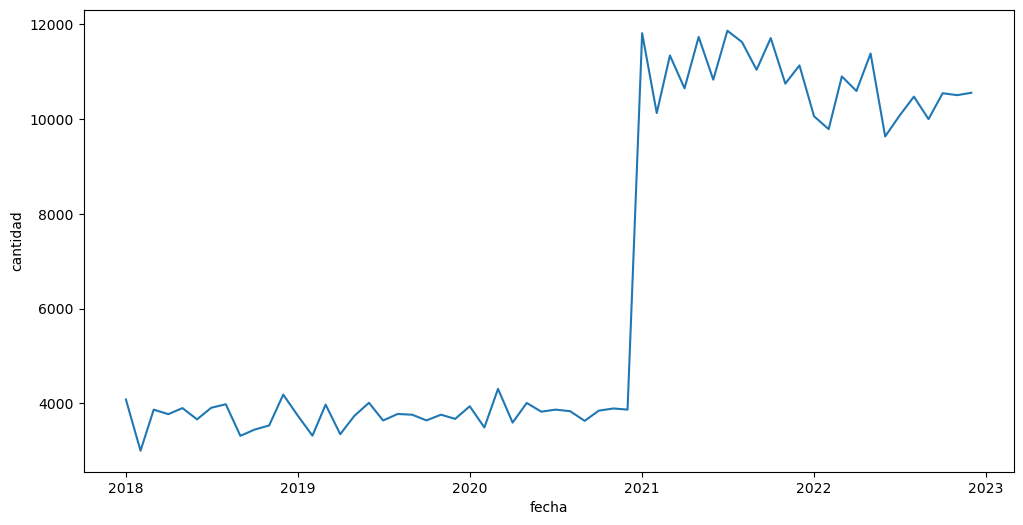

In [57]:
fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.lineplot(x = "fecha", y = "cantidad", data = df_vinoylicores, 
                  estimator = sum, ci = None)#, palette=P_DICT)

#x_dates = df_2['fecha2'].dt.strftime('%Y-%m-%d').sort_values().unique()
#fig.set_xticklabels(labels=x_dates, rotation=90)#, ha='right')

In [61]:
df_prophet = df_vinoylicores[df_vinoylicores.fecha.dt.year>=2021]

In [62]:
df_prophet['fecha'] = df_prophet['fecha'].apply(lambda dt: dt.replace(day=1))
df_prophet = df_prophet.groupby(['fecha']).agg({
                                                'cantidad':'sum'
}).reset_index()
#df_sales_forecast['fecha'] = pd.to_datetime(df_sales_forecast['fecha'])
df_prophet

C:\Users\wmr_w\AppData\Local\Temp\ipykernel_10412\815961061.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prophet['fecha'] = df_prophet['fecha'].apply(lambda dt: dt.replace(day=1))


,fecha,cantidad
0,2021-01-01,11807
1,2021-02-01,10124
2,2021-03-01,11338
3,2021-04-01,10645
4,2021-05-01,11729
5,2021-06-01,10828
6,2021-07-01,11860
7,2021-08-01,11621
8,2021-09-01,11036
9,2021-10-01,11705


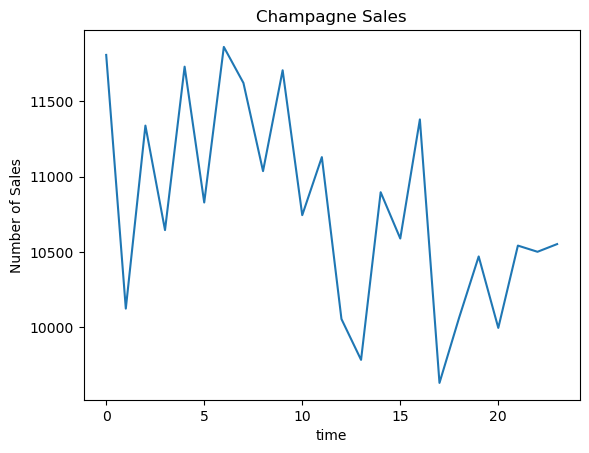

In [63]:
# Plot the data
plt.plot(df_prophet.iloc[:,1].values)
plt.xlabel("time")
plt.ylabel("Number of Sales")
plt.title("Champagne Sales")
plt.show()

In [68]:
# PARTICIONAR datos en Train-Test-Split
train_df = df_prophet.loc[:20].copy()
test_df = df_prophet.loc[21:].copy()

In [70]:
train_df

,fecha,cantidad
0,2021-01-01,11807
1,2021-02-01,10124
2,2021-03-01,11338
3,2021-04-01,10645
4,2021-05-01,11729
5,2021-06-01,10828
6,2021-07-01,11860
7,2021-08-01,11621
8,2021-09-01,11036
9,2021-10-01,11705


In [71]:
print(train_df.shape)
print(test_df.shape)

(21, 2)
(3, 2)


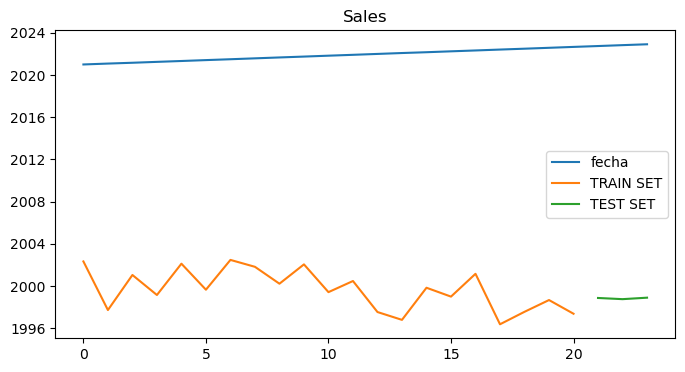

In [73]:
# Plotting train and test split
train_df.rename(columns={'cantidad': 'TRAIN SET'}).merge(test_df.rename(columns={'cantidad': 'TEST SET'}),how='outer').plot(figsize=(8,4), title='Sales', style="-")
plt.show()

In [75]:
# Format data for prophet model using ds and y
train_df = train_df.reset_index().rename(columns={'fecha':'ds','cantidad':'y'})
train_df.drop(["index"], axis=1, inplace=True)
train_df.head()

,ds,y
0,2021-01-01,11807
1,2021-02-01,10124
2,2021-03-01,11338
3,2021-04-01,10645
4,2021-05-01,11729


In [76]:
# Format data for prophet model using ds and y
test_df = test_df.reset_index().rename(columns={'fecha':'ds','cantidad':'y'})
test_df.drop(["index"], axis=1, inplace=True)
test_df.head()

,ds,y
0,2022-10-01,10542
1,2022-11-01,10501
2,2022-12-01,10552


In [77]:
model = Prophet()
model.fit(train_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 15.


In [78]:
# Predict on test set with model
forecast = model.predict(test_df)

In [79]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-10-01,10149.199899,9363.515844,10900.557025,10149.199832,10149.199963,0.0,0.0,0.0,0.0,0.0,0.0,10149.199899
1,2022-11-01,10086.146173,9309.872838,10799.498466,10086.145936,10086.146429,0.0,0.0,0.0,0.0,0.0,0.0,10086.146173
2,2022-12-01,10025.126439,9328.462311,10737.388368,10025.125962,10025.126942,0.0,0.0,0.0,0.0,0.0,0.0,10025.126439


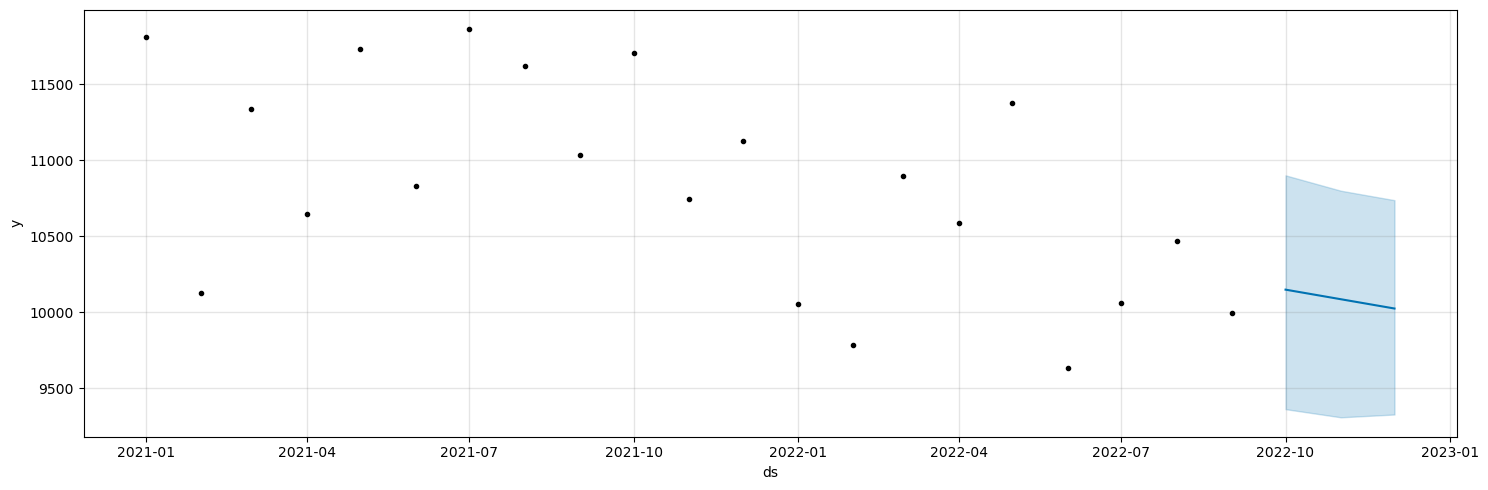

In [80]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(forecast,ax=ax)
plt.show()

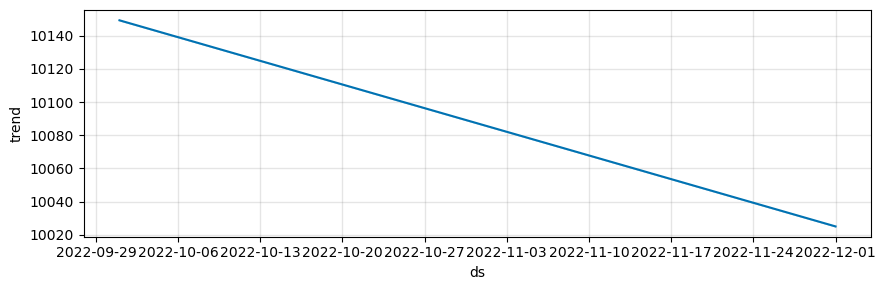

In [82]:
# Plot the components of the model
fig = model.plot_components(forecast)

In [83]:
test_df['Prediction'] = forecast["yhat"]

In [84]:
test_df

,ds,y,Prediction
0,2022-10-01,10542,10149.199899
1,2022-11-01,10501,10086.146173
2,2022-12-01,10552,10025.126439


In [85]:
prophet_plot = pd.concat([train_df,test_df], sort=False)

In [86]:
prophet_plot.reset_index(inplace=True)

In [87]:
prophet_plot.tail(6)

,index,ds,y,Prediction
18,18,2022-07-01,10063,NaN
19,19,2022-08-01,10470,NaN
20,20,2022-09-01,9996,NaN
21,0,2022-10-01,10542,10149.199899
22,1,2022-11-01,10501,10086.146173
23,2,2022-12-01,10552,10025.126439


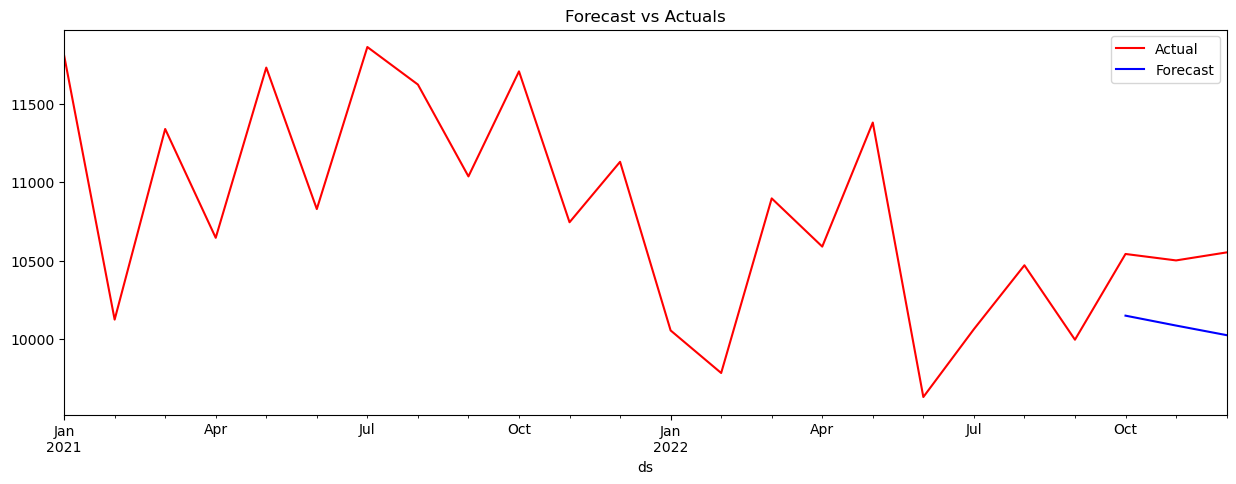

In [88]:
f, ax = plt.subplots(figsize=(14,5))
f.set_figheight(5)
f.set_figwidth(15)
prophet_plot.plot(kind='line',x='ds', y='y', color='red', label='Actual', ax=ax)
prophet_plot.plot(kind='line',x='ds',y='Prediction', color='blue',label='Forecast', ax=ax)
plt.title("Forecast vs Actuals")
plt.show()

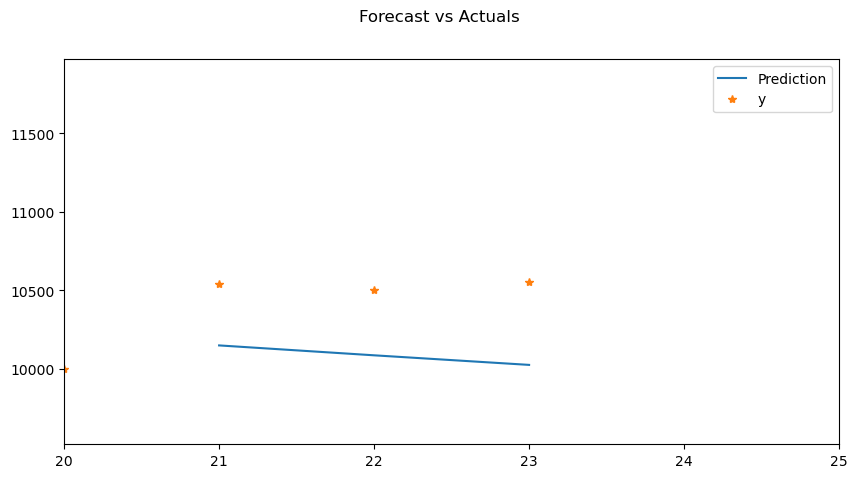

In [90]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(10)
_ = prophet_plot[['Prediction','y']].plot(ax=ax, style=['-','*'])
ax.set_xbound(lower=20, upper=25)
#ax.set_ylim(0, 15000)
plot = plt.suptitle('Forecast vs Actuals')

In [94]:
future = model.make_future_dataframe(periods = 12, freq='MS')
future['ds'] = future['ds'].apply(lambda x:x.strftime('%Y-%m-%d'))
future

,ds
0,2021-01-01
1,2021-02-01
2,2021-03-01
3,2021-04-01
4,2021-05-01
5,2021-06-01
6,2021-07-01
7,2021-08-01
8,2021-09-01
9,2021-10-01


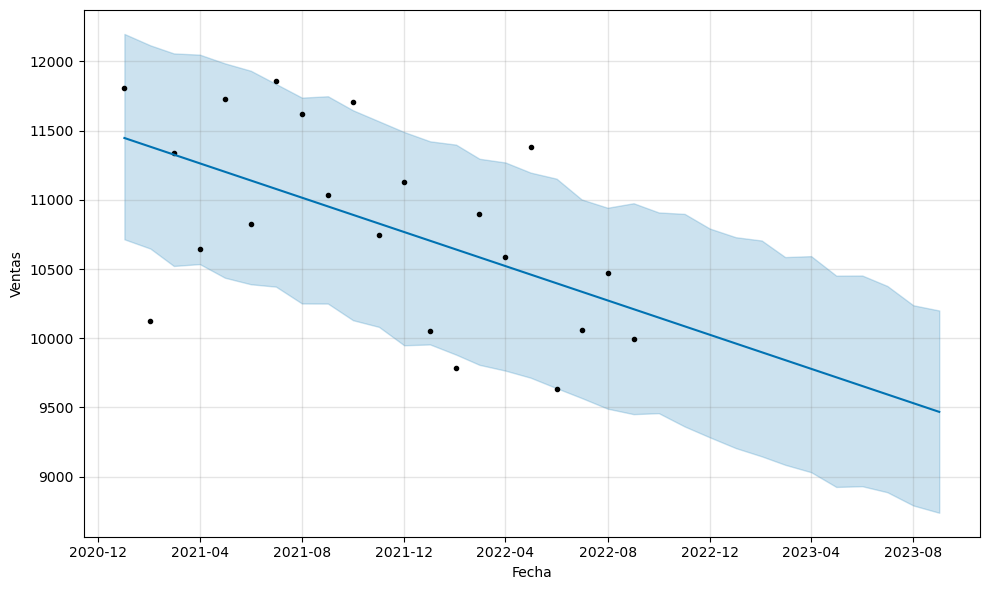

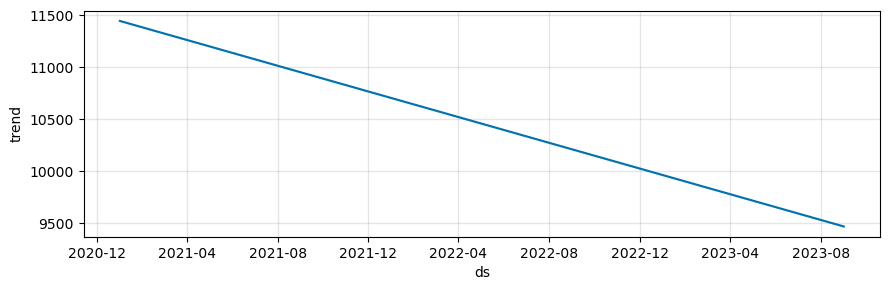

In [95]:
#model    = Prophet()
#model.fit(sales_df)
#future   = model.make_future_dataframe(periods = 12)
forecast2 = model.predict(future)
figure   = model.plot(forecast2, xlabel = "Fecha", ylabel = "Ventas")
figure2  = model.plot_components(forecast2)

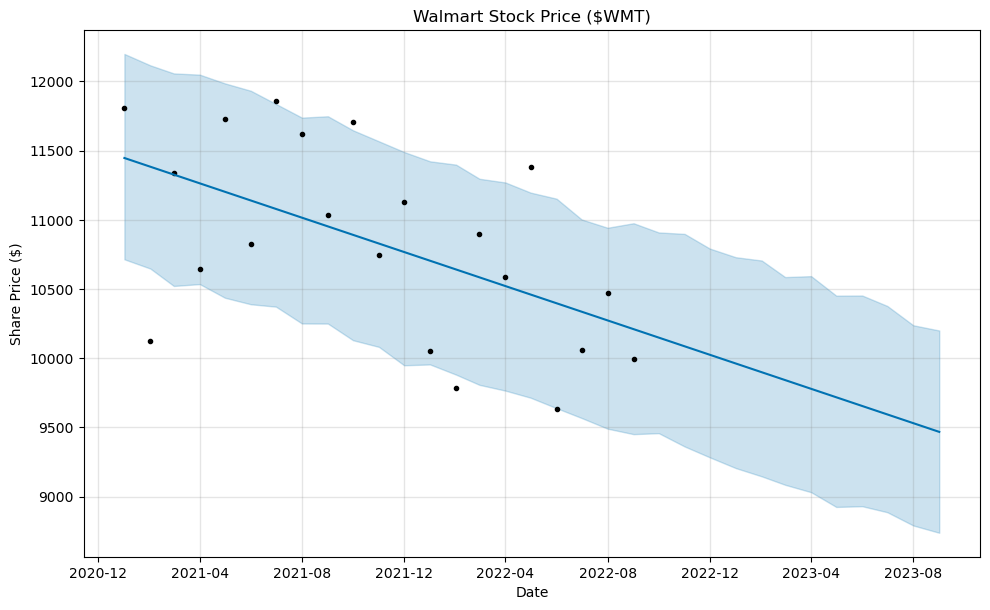

In [96]:
# plot forecasts
model.plot(forecast2, xlabel='Date', ylabel='Share Price ($)')
plt.title('Walmart Stock Price ($WMT)')
plt.show()

In [97]:
from sklearn.model_selection import ParameterGrid
params_grid = {'seasonality_mode':("multiplicative","additive"),
               'seasonality_prior_scale': [0.1, 1.0],
               'changepoint_prior_scale':[0.15, 0.20, 0.25, 0.3],
               'n_changepoints' : [16,32,64]
              }
grid = ParameterGrid(params_grid)
cnt = 0
for p in grid:
    cnt = cnt+1

print('Total Possible Models',cnt)

Total Possible Models 48


In [103]:
import random
import math
from sklearn.metrics import mean_squared_error

In [104]:
model_parameters = pd.DataFrame(columns = ['RMSE','Parameters'])
for p in grid:
    test = pd.DataFrame()
    print(p)
    random.seed(0)
    train_model =Prophet(changepoint_prior_scale = p['changepoint_prior_scale'],
                         n_changepoints = p['n_changepoints'],
                         seasonality_mode = p['seasonality_mode'],
                         seasonality_prior_scale = p["seasonality_prior_scale"],
                         yearly_seasonality = False,
                         weekly_seasonality = False,
                         daily_seasonality = False,
                         interval_width=0.95)
    train_model.add_seasonality(name="yearly",period=365.25,fourier_order=8)
    train_model.fit(train_df)
    train_forecast = train_model.make_future_dataframe(periods=3, freq='M', include_history = False)
    forecast = train_model.predict(train_forecast)
    test=forecast[['ds','yhat']]
    RMSE = math.sqrt(mean_squared_error(test_df['y'],abs(test['yhat'])))
    print('RMSE------------------------------------',RMSE)
    model_parameters = model_parameters.append({'RMSE':RMSE,'Parameters':p},ignore_index=True)

c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:n_changepoints greater than number of observations. Using 15.


{'changepoint_prior_scale': 0.15, 'n_changepoints': 16, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\wmr_w\AppData\Local\Temp\ipykernel_10412\3193132410.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'RMSE':RMSE,'Parameters':p},ignore_index=True)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  component

RMSE------------------------------------ 1032.111037086839
{'changepoint_prior_scale': 0.15, 'n_changepoints': 16, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\wmr_w\AppData\Local\Temp\ipykernel_10412\3193132410.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'RMSE':RMSE,'Parameters':p},ignore_index=True)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  component

RMSE------------------------------------ 1629.5596663652982
{'changepoint_prior_scale': 0.15, 'n_changepoints': 16, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\wmr_w\AppData\Local\Temp\ipykernel_10412\3193132410.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'RMSE':RMSE,'Parameters':p},ignore_index=True)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  component

RMSE------------------------------------ 1024.082534069597
{'changepoint_prior_scale': 0.15, 'n_changepoints': 16, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\wmr_w\AppData\Local\Temp\ipykernel_10412\3193132410.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'RMSE':RMSE,'Parameters':p},ignore_index=True)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  component

RMSE------------------------------------ 1566.695050606822
{'changepoint_prior_scale': 0.15, 'n_changepoints': 32, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\wmr_w\AppData\Local\Temp\ipykernel_10412\3193132410.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'RMSE':RMSE,'Parameters':p},ignore_index=True)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  component

RMSE------------------------------------ 1032.111037086839
{'changepoint_prior_scale': 0.15, 'n_changepoints': 32, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\wmr_w\AppData\Local\Temp\ipykernel_10412\3193132410.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'RMSE':RMSE,'Parameters':p},ignore_index=True)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  component

RMSE------------------------------------ 1629.5596663652982
{'changepoint_prior_scale': 0.15, 'n_changepoints': 32, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\wmr_w\AppData\Local\Temp\ipykernel_10412\3193132410.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'RMSE':RMSE,'Parameters':p},ignore_index=True)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  component

RMSE------------------------------------ 1024.082534069597
{'changepoint_prior_scale': 0.15, 'n_changepoints': 32, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\wmr_w\AppData\Local\Temp\ipykernel_10412\3193132410.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'RMSE':RMSE,'Parameters':p},ignore_index=True)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  component

RMSE------------------------------------ 1566.695050606822
{'changepoint_prior_scale': 0.15, 'n_changepoints': 64, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\wmr_w\AppData\Local\Temp\ipykernel_10412\3193132410.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'RMSE':RMSE,'Parameters':p},ignore_index=True)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  component

RMSE------------------------------------ 1032.111037086839
{'changepoint_prior_scale': 0.15, 'n_changepoints': 64, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\wmr_w\AppData\Local\Temp\ipykernel_10412\3193132410.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'RMSE':RMSE,'Parameters':p},ignore_index=True)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  component

RMSE------------------------------------ 1629.5596663652982
{'changepoint_prior_scale': 0.15, 'n_changepoints': 64, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\wmr_w\AppData\Local\Temp\ipykernel_10412\3193132410.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'RMSE':RMSE,'Parameters':p},ignore_index=True)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  component

RMSE------------------------------------ 1024.082534069597
{'changepoint_prior_scale': 0.15, 'n_changepoints': 64, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\wmr_w\AppData\Local\Temp\ipykernel_10412\3193132410.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'RMSE':RMSE,'Parameters':p},ignore_index=True)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  component

RMSE------------------------------------ 1566.695050606822
{'changepoint_prior_scale': 0.2, 'n_changepoints': 16, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\wmr_w\AppData\Local\Temp\ipykernel_10412\3193132410.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'RMSE':RMSE,'Parameters':p},ignore_index=True)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  component

RMSE------------------------------------ 570.0078623356518
{'changepoint_prior_scale': 0.2, 'n_changepoints': 16, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\wmr_w\AppData\Local\Temp\ipykernel_10412\3193132410.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'RMSE':RMSE,'Parameters':p},ignore_index=True)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  component

RMSE------------------------------------ 1666.180659695403
{'changepoint_prior_scale': 0.2, 'n_changepoints': 16, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\wmr_w\AppData\Local\Temp\ipykernel_10412\3193132410.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'RMSE':RMSE,'Parameters':p},ignore_index=True)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  component

RMSE------------------------------------ 268.02442089909306
{'changepoint_prior_scale': 0.2, 'n_changepoints': 16, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\wmr_w\AppData\Local\Temp\ipykernel_10412\3193132410.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'RMSE':RMSE,'Parameters':p},ignore_index=True)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  component

RMSE------------------------------------ 2212.161638279885
{'changepoint_prior_scale': 0.2, 'n_changepoints': 32, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\wmr_w\AppData\Local\Temp\ipykernel_10412\3193132410.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'RMSE':RMSE,'Parameters':p},ignore_index=True)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  component

RMSE------------------------------------ 570.0078623356518
{'changepoint_prior_scale': 0.2, 'n_changepoints': 32, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\wmr_w\AppData\Local\Temp\ipykernel_10412\3193132410.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'RMSE':RMSE,'Parameters':p},ignore_index=True)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  component

RMSE------------------------------------ 1666.180659695403
{'changepoint_prior_scale': 0.2, 'n_changepoints': 32, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\wmr_w\AppData\Local\Temp\ipykernel_10412\3193132410.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'RMSE':RMSE,'Parameters':p},ignore_index=True)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  component

RMSE------------------------------------ 268.02442089909306
{'changepoint_prior_scale': 0.2, 'n_changepoints': 32, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\wmr_w\AppData\Local\Temp\ipykernel_10412\3193132410.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'RMSE':RMSE,'Parameters':p},ignore_index=True)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  component

RMSE------------------------------------ 2212.161638279885
{'changepoint_prior_scale': 0.2, 'n_changepoints': 64, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\wmr_w\AppData\Local\Temp\ipykernel_10412\3193132410.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'RMSE':RMSE,'Parameters':p},ignore_index=True)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  component

RMSE------------------------------------ 570.0078623356518
{'changepoint_prior_scale': 0.2, 'n_changepoints': 64, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\wmr_w\AppData\Local\Temp\ipykernel_10412\3193132410.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'RMSE':RMSE,'Parameters':p},ignore_index=True)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  component

RMSE------------------------------------ 1666.180659695403
{'changepoint_prior_scale': 0.2, 'n_changepoints': 64, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\wmr_w\AppData\Local\Temp\ipykernel_10412\3193132410.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'RMSE':RMSE,'Parameters':p},ignore_index=True)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  component

RMSE------------------------------------ 268.02442089909306
{'changepoint_prior_scale': 0.2, 'n_changepoints': 64, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\wmr_w\AppData\Local\Temp\ipykernel_10412\3193132410.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'RMSE':RMSE,'Parameters':p},ignore_index=True)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  component

RMSE------------------------------------ 2212.161638279885
{'changepoint_prior_scale': 0.25, 'n_changepoints': 16, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\wmr_w\AppData\Local\Temp\ipykernel_10412\3193132410.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'RMSE':RMSE,'Parameters':p},ignore_index=True)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  component

RMSE------------------------------------ 552.2758300218885
{'changepoint_prior_scale': 0.25, 'n_changepoints': 16, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\wmr_w\AppData\Local\Temp\ipykernel_10412\3193132410.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'RMSE':RMSE,'Parameters':p},ignore_index=True)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  component

RMSE------------------------------------ 810.3583446497623
{'changepoint_prior_scale': 0.25, 'n_changepoints': 16, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\wmr_w\AppData\Local\Temp\ipykernel_10412\3193132410.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'RMSE':RMSE,'Parameters':p},ignore_index=True)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  component

RMSE------------------------------------ 462.1045148728759
{'changepoint_prior_scale': 0.25, 'n_changepoints': 16, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\wmr_w\AppData\Local\Temp\ipykernel_10412\3193132410.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'RMSE':RMSE,'Parameters':p},ignore_index=True)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  component

RMSE------------------------------------ 3299.905622126167
{'changepoint_prior_scale': 0.25, 'n_changepoints': 32, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\wmr_w\AppData\Local\Temp\ipykernel_10412\3193132410.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'RMSE':RMSE,'Parameters':p},ignore_index=True)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  component

RMSE------------------------------------ 552.2758300218885
{'changepoint_prior_scale': 0.25, 'n_changepoints': 32, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\wmr_w\AppData\Local\Temp\ipykernel_10412\3193132410.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'RMSE':RMSE,'Parameters':p},ignore_index=True)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  component

RMSE------------------------------------ 810.3583446497623
{'changepoint_prior_scale': 0.25, 'n_changepoints': 32, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\wmr_w\AppData\Local\Temp\ipykernel_10412\3193132410.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'RMSE':RMSE,'Parameters':p},ignore_index=True)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  component

RMSE------------------------------------ 462.1045148728759
{'changepoint_prior_scale': 0.25, 'n_changepoints': 32, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\wmr_w\AppData\Local\Temp\ipykernel_10412\3193132410.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'RMSE':RMSE,'Parameters':p},ignore_index=True)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  component

RMSE------------------------------------ 3299.905622126167
{'changepoint_prior_scale': 0.25, 'n_changepoints': 64, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\wmr_w\AppData\Local\Temp\ipykernel_10412\3193132410.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'RMSE':RMSE,'Parameters':p},ignore_index=True)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  component

RMSE------------------------------------ 552.2758300218885
{'changepoint_prior_scale': 0.25, 'n_changepoints': 64, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\wmr_w\AppData\Local\Temp\ipykernel_10412\3193132410.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'RMSE':RMSE,'Parameters':p},ignore_index=True)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  component

RMSE------------------------------------ 810.3583446497623
{'changepoint_prior_scale': 0.25, 'n_changepoints': 64, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\wmr_w\AppData\Local\Temp\ipykernel_10412\3193132410.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'RMSE':RMSE,'Parameters':p},ignore_index=True)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  component

RMSE------------------------------------ 462.1045148728759
{'changepoint_prior_scale': 0.25, 'n_changepoints': 64, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\wmr_w\AppData\Local\Temp\ipykernel_10412\3193132410.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'RMSE':RMSE,'Parameters':p},ignore_index=True)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  component

RMSE------------------------------------ 3299.905622126167
{'changepoint_prior_scale': 0.3, 'n_changepoints': 16, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\wmr_w\AppData\Local\Temp\ipykernel_10412\3193132410.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'RMSE':RMSE,'Parameters':p},ignore_index=True)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  component

RMSE------------------------------------ 652.0262369508143
{'changepoint_prior_scale': 0.3, 'n_changepoints': 16, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\wmr_w\AppData\Local\Temp\ipykernel_10412\3193132410.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'RMSE':RMSE,'Parameters':p},ignore_index=True)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  component

RMSE------------------------------------ 3103.8967799574084
{'changepoint_prior_scale': 0.3, 'n_changepoints': 16, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\wmr_w\AppData\Local\Temp\ipykernel_10412\3193132410.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'RMSE':RMSE,'Parameters':p},ignore_index=True)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  component

RMSE------------------------------------ 203.15415081953768
{'changepoint_prior_scale': 0.3, 'n_changepoints': 16, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\wmr_w\AppData\Local\Temp\ipykernel_10412\3193132410.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'RMSE':RMSE,'Parameters':p},ignore_index=True)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  component

RMSE------------------------------------ 7946.778844764507
{'changepoint_prior_scale': 0.3, 'n_changepoints': 32, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\wmr_w\AppData\Local\Temp\ipykernel_10412\3193132410.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'RMSE':RMSE,'Parameters':p},ignore_index=True)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  component

RMSE------------------------------------ 652.0262369508143
{'changepoint_prior_scale': 0.3, 'n_changepoints': 32, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\wmr_w\AppData\Local\Temp\ipykernel_10412\3193132410.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'RMSE':RMSE,'Parameters':p},ignore_index=True)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  component

RMSE------------------------------------ 3103.8967799574084
{'changepoint_prior_scale': 0.3, 'n_changepoints': 32, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\wmr_w\AppData\Local\Temp\ipykernel_10412\3193132410.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'RMSE':RMSE,'Parameters':p},ignore_index=True)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  component

RMSE------------------------------------ 203.15415081953768
{'changepoint_prior_scale': 0.3, 'n_changepoints': 32, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\wmr_w\AppData\Local\Temp\ipykernel_10412\3193132410.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'RMSE':RMSE,'Parameters':p},ignore_index=True)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  component

RMSE------------------------------------ 7946.778844764507
{'changepoint_prior_scale': 0.3, 'n_changepoints': 64, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}


c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\wmr_w\AppData\Local\Temp\ipykernel_10412\3193132410.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'RMSE':RMSE,'Parameters':p},ignore_index=True)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  component

RMSE------------------------------------ 652.0262369508143
{'changepoint_prior_scale': 0.3, 'n_changepoints': 64, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}


c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\wmr_w\AppData\Local\Temp\ipykernel_10412\3193132410.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'RMSE':RMSE,'Parameters':p},ignore_index=True)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  component

RMSE------------------------------------ 3103.8967799574084
{'changepoint_prior_scale': 0.3, 'n_changepoints': 64, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}


c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\wmr_w\AppData\Local\Temp\ipykernel_10412\3193132410.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'RMSE':RMSE,'Parameters':p},ignore_index=True)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  component

RMSE------------------------------------ 203.15415081953768
{'changepoint_prior_scale': 0.3, 'n_changepoints': 64, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}


c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


RMSE------------------------------------ 7946.778844764507


C:\Users\wmr_w\AppData\Local\Temp\ipykernel_10412\3193132410.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'RMSE':RMSE,'Parameters':p},ignore_index=True)


In [105]:
parameters = model_parameters.sort_values(by=['RMSE'])
parameters = parameters.reset_index(drop=True)
parameters.head()

,RMSE,Parameters
0,203.154151,"{'changepoint_prior_scale': 0.3, 'n_changepoin..."
1,203.154151,"{'changepoint_prior_scale': 0.3, 'n_changepoin..."
2,203.154151,"{'changepoint_prior_scale': 0.3, 'n_changepoin..."
3,268.024421,"{'changepoint_prior_scale': 0.2, 'n_changepoin..."
4,268.024421,"{'changepoint_prior_scale': 0.2, 'n_changepoin..."


In [106]:
parameters['Parameters'][0]

{'changepoint_prior_scale': 0.3,
 'n_changepoints': 64,
 'seasonality_mode': 'additive',
 'seasonality_prior_scale': 0.1}

In [107]:
final_model = Prophet(changepoint_prior_scale= 0.3,
                      n_changepoints = 64,
                      seasonality_mode = 'additive',
                      seasonality_prior_scale = 0.1,
                      yearly_seasonality = False,
                      weekly_seasonality = False,
                      daily_seasonality = False,
                      interval_width=0.95)
final_model.add_seasonality(name="yearly",period=365.25,fourier_order=8)
final_model.fit(train_df)

c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:n_changepoints greater than number of observations. Using 15.


In [165]:
future = final_model.make_future_dataframe(periods=15, freq="MS",include_history = False)
#future['ds'] = future['ds'].apply(lambda x:x.strftime('%Y-%m'))
final_forecast = final_model.predict(future)
final_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
#final_forecast['ds'] = final_forecast['ds'].apply(lambda x:x.strftime('%Y-%m'))
final_forecast.head()

c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-10-01,10057.430042,10587.855394,11474.222045,9624.823589,10511.190240,963.031805,963.031805,963.031805,963.031805,963.031805,963.031805,0.0,0.0,0.0,11020.461846
1,2022-11-01,9916.154284,8933.569572,11434.968305,8646.866300,11148.265033,286.703272,286.703272,286.703272,286.703272,286.703272,286.703272,0.0,0.0,0.0,10202.857556
2,2022-12-01,9779.435809,8273.677686,12406.179283,7744.343221,11876.844818,529.334465,529.334465,529.334465,529.334465,529.334465,529.334465,0.0,0.0,0.0,10308.770274
3,2023-01-01,9638.160052,5685.430579,11897.667058,6544.002098,12756.238577,-858.571519,-858.571519,-858.571519,-858.571519,-858.571519,-858.571519,0.0,0.0,0.0,8779.588532
4,2023-02-01,9496.884294,4318.281361,13118.885566,5186.217179,13986.821383,-867.935818,-867.935818,-867.935818,-867.935818,-867.935818,-867.935818,0.0,0.0,0.0,8628.948476


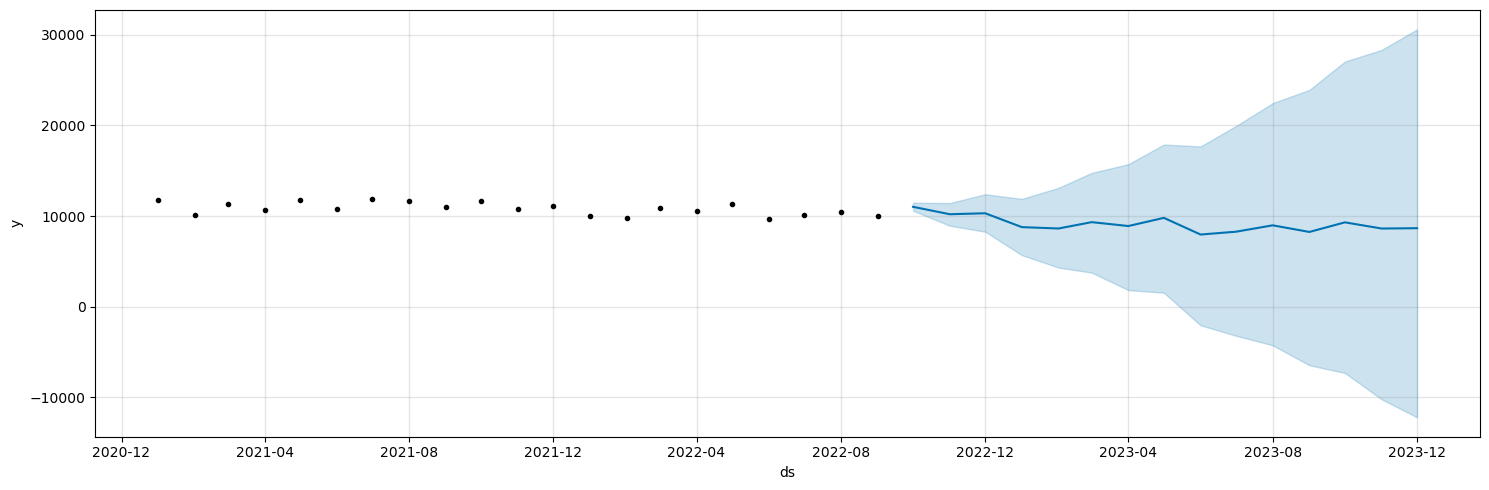

In [166]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(final_forecast,ax=ax)
plt.show()

c:\Users\wmr_w\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


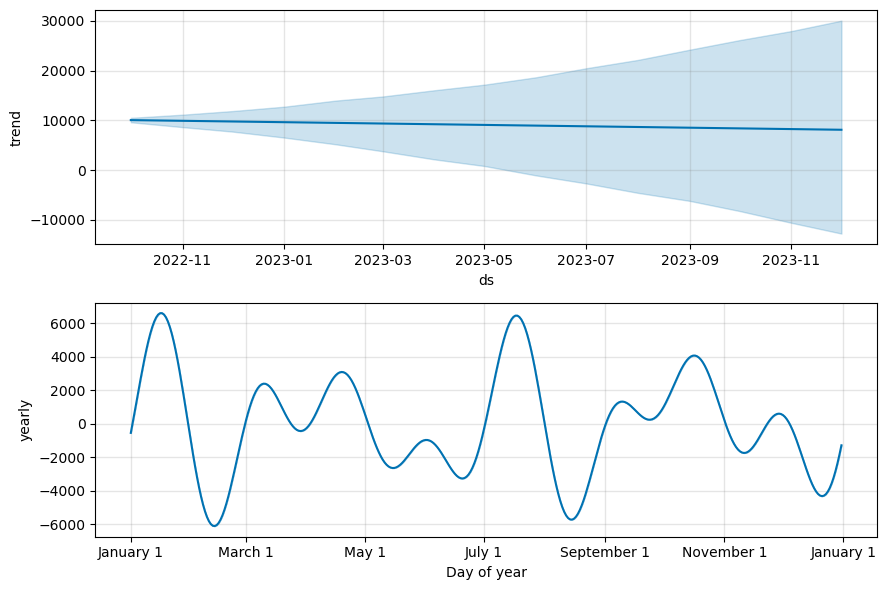

In [167]:
fig = final_model.plot_components(final_forecast)

In [168]:
test_df['Prediction'] = final_forecast["yhat"]

In [169]:
test_df

,ds,y,Prediction
0,2022-10-01,10542,11020.461846
1,2022-11-01,10501,10202.857556
2,2022-12-01,10552,10308.770274


In [170]:
final_forecast.tail(15)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-10-01,10057.430042,10587.855394,11474.222045,9624.823589,10511.190240,963.031805,963.031805,963.031805,963.031805,963.031805,963.031805,0.0,0.0,0.0,11020.461846
1,2022-11-01,9916.154284,8933.569572,11434.968305,8646.866300,11148.265033,286.703272,286.703272,286.703272,286.703272,286.703272,286.703272,0.0,0.0,0.0,10202.857556
2,2022-12-01,9779.435809,8273.677686,12406.179283,7744.343221,11876.844818,529.334465,529.334465,529.334465,529.334465,529.334465,529.334465,0.0,0.0,0.0,10308.770274
3,2023-01-01,9638.160052,5685.430579,11897.667058,6544.002098,12756.238577,-858.571519,-858.571519,-858.571519,-858.571519,-858.571519,-858.571519,0.0,0.0,0.0,8779.588532
4,2023-02-01,9496.884294,4318.281361,13118.885566,5186.217179,13986.821383,-867.935818,-867.935818,-867.935818,-867.935818,-867.935818,-867.935818,0.0,0.0,0.0,8628.948476
5,2023-03-01,9369.280384,3757.754290,14767.016886,3797.401036,14806.663632,-39.646746,-39.646746,-39.646746,-39.646746,-39.646746,-39.646746,0.0,0.0,0.0,9329.633638
6,2023-04-01,9228.004627,1833.574683,15729.799777,2160.580158,16056.805251,-327.005475,-327.005475,-327.005475,-327.005475,-327.005475,-327.005475,0.0,0.0,0.0,8900.999152
7,2023-05-01,9091.286152,1540.994896,17894.588866,829.790446,17183.384416,711.204449,711.204449,711.204449,711.204449,711.204449,711.204449,0.0,0.0,0.0,9802.490601
8,2023-06-01,8950.010394,-2051.626386,17682.934825,-1063.706339,18670.854872,-987.920048,-987.920048,-987.920048,-987.920048,-987.920048,-987.920048,0.0,0.0,0.0,7962.090347
9,2023-07-01,8813.291919,-3208.311274,19942.103581,-2670.604349,20479.810505,-537.706924,-537.706924,-537.706924,-537.706924,-537.706924,-537.706924,0.0,0.0,0.0,8275.584995


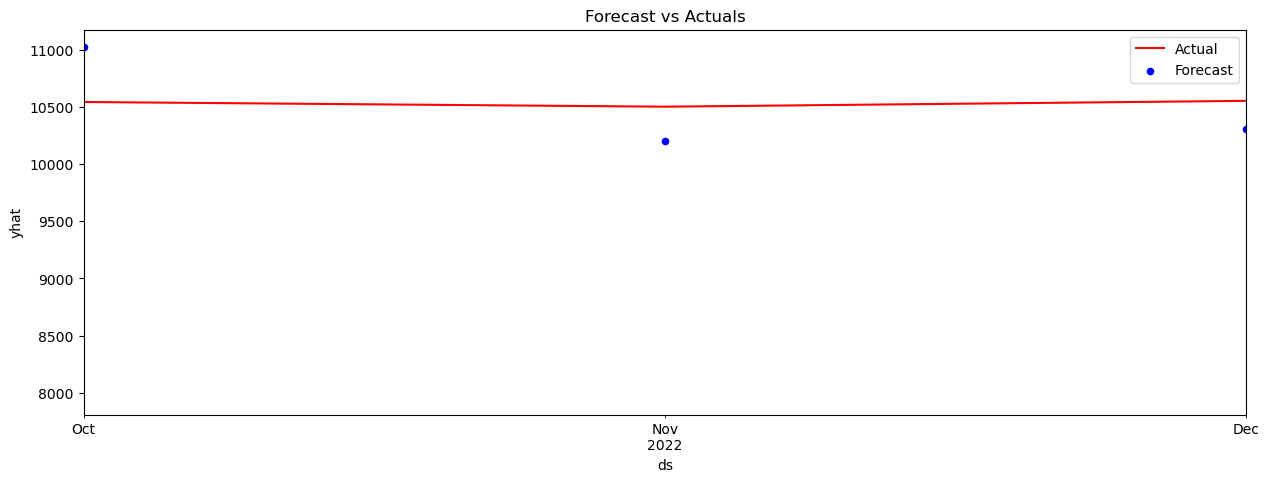

In [171]:
f, ax = plt.subplots(figsize=(14,5))
f.set_figheight(5)
f.set_figwidth(15)
test_df.plot(kind='line',x='ds', y='y', color='red', label='Actual', ax=ax)
final_forecast.plot(kind='scatter',x='ds',y='yhat', color='blue',label='Forecast', ax=ax)
plt.title("Forecast vs Actuals")
plt.show()

In [172]:
prophet_plot = pd.concat([train_df,test_df], sort=False)
prophet_plot.reset_index(inplace=True)

In [173]:
prophet_plot

,index,ds,y,Prediction
0,0,2021-01-01,11807,NaN
1,1,2021-02-01,10124,NaN
2,2,2021-03-01,11338,NaN
3,3,2021-04-01,10645,NaN
4,4,2021-05-01,11729,NaN
5,5,2021-06-01,10828,NaN
6,6,2021-07-01,11860,NaN
7,7,2021-08-01,11621,NaN
8,8,2021-09-01,11036,NaN
9,9,2021-10-01,11705,NaN


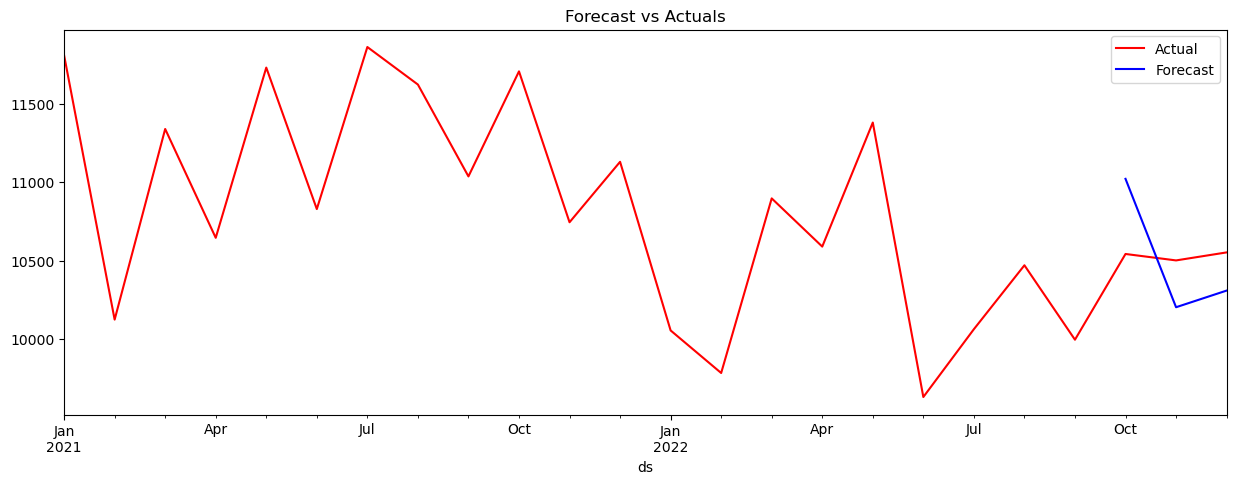

In [174]:
f, ax = plt.subplots(figsize=(14,5))
f.set_figheight(5)
f.set_figwidth(15)
prophet_plot.plot(kind='line',x='ds', y='y', color='red', label='Actual', ax=ax)
prophet_plot.plot(kind='line',x='ds',y='Prediction', color='blue',label='Forecast', ax=ax)
plt.title("Forecast vs Actuals")
plt.show()

In [175]:
final_forecast[['ds','yhat']]

,ds,yhat
0,2022-10-01,11020.461846
1,2022-11-01,10202.857556
2,2022-12-01,10308.770274
3,2023-01-01,8779.588532
4,2023-02-01,8628.948476
5,2023-03-01,9329.633638
6,2023-04-01,8900.999152
7,2023-05-01,9802.490601
8,2023-06-01,7962.090347
9,2023-07-01,8275.584995


In [176]:
y1 = final_forecast[final_forecast['ds'].dt.year==2023][['ds','yhat']]

In [178]:
y2 = prophet_plot[['ds','y']]
y2.rename(columns = {'y':'yhat'}, inplace = True)


C:\Users\wmr_w\AppData\Local\Temp\ipykernel_10412\140356264.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y2.rename(columns = {'y':'yhat'}, inplace = True)


In [181]:
PronosticoVentas = pd.concat([y2,y1], sort=False)
PronosticoVentas.reset_index(inplace=True,drop=False)

In [182]:
PronosticoVentas.head(30)

,index,ds,yhat
0,0,2021-01-01,11807.000000
1,1,2021-02-01,10124.000000
2,2,2021-03-01,11338.000000
3,3,2021-04-01,10645.000000
4,4,2021-05-01,11729.000000
5,5,2021-06-01,10828.000000
6,6,2021-07-01,11860.000000
7,7,2021-08-01,11621.000000
8,8,2021-09-01,11036.000000
9,9,2021-10-01,11705.000000


In [185]:
PronosticoVentas.to_excel('Pronostico.xlsx', index=False)

# pruebas sin SQL CONDICIONAL 

In [31]:
df_Mvendedor.to_csv('df_Mvendedor.csv')
df_Mcliente.to_csv('df_Mcliente.csv')
df_Mproducto.to_csv('df_Mproducto.csv')
df_ventas_group.to_csv('ventas.csv')

In [4]:
df_Mvendedor= pd.read_csv('df_Mvendedor.csv')
df_Mcliente= pd.read_csv('df_Mcliente.csv')
df_Mproducto= pd.read_csv('df_Mproducto.csv')
df_ventas_group= pd.read_csv('ventas.csv')